# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience </a>

Дана параметрическая модель и 3 выборки, состоящие из 2-3 наблюдений. Для удобства, выборки представлены в виде python-кода — каждая выборка записана как список ее элементов; множество выборок представлено как список списков, соответствующих выборкам из множества. Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: `[[-1, 1], [-5, 5], [-1, 5]]`

*b).* Параметрическая модель $Exp(\theta)$, выборки: `[[1, 2], [0.1, 1], [1, 10]]`

*c).* Параметрическая модель $U[0, \theta]$, выборки: `[[0.2, 0.8], [0.5, 1], [0.5, 1.3]]`

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: `[[0, 1], [5, 5], [0, 5]]`

*e).* Параметрическая модель $Pois(\theta)$, выборки: `[[0, 1], [0, 10], [5, 10]]`

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ — параметр сдвига, выборки: `[[-0.5, 0.5], [-2, 2], [-4, 0, 4]]`

Выполнить задание, не создавая много кода, поможет следующая функция.

In [3]:
import tensorflow_probability as tfp
import numpy as np
import matplotlib.pyplot as plt

tfd = tfp.distributions

def draw_likelihood(density_function, grid, samples, label):
    '''
    Изображает график функции правдоподобия для каждой из 3 выборок.
    
    Аргументы:
        density_function --- функция, считающая плотность 
            (обычную или дискретную). На вход данная функция 
            должна принимать массив размера (1, len_sample)
            и возвращать массив размера (len_grid, len_sample).
        grid --- массив размера (len_grid, 1), являющийся 
                 сеткой для построения графика;
        samples --- три выборки;
        label --- latex-код параметрической модели.
    '''
    
    assert len(samples) == 3, "Число выборок не равно 3."

    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        likelihood = density_function(sample).prod(axis=1) 
        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода:

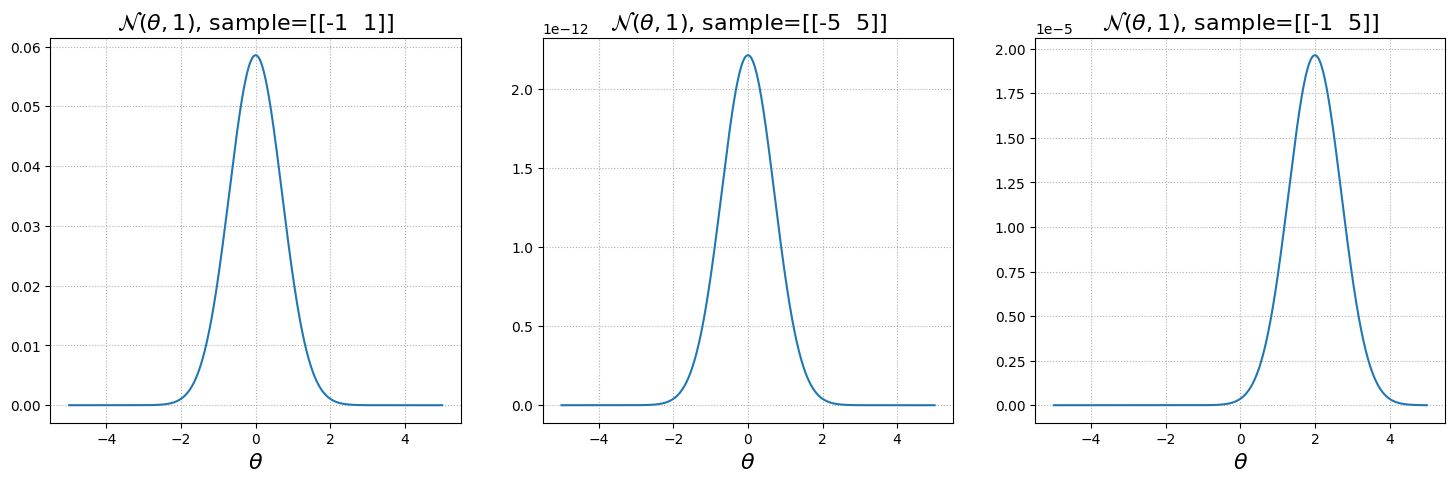

In [4]:
import scipy.stats as sps
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid, 
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

Выполните остальные:

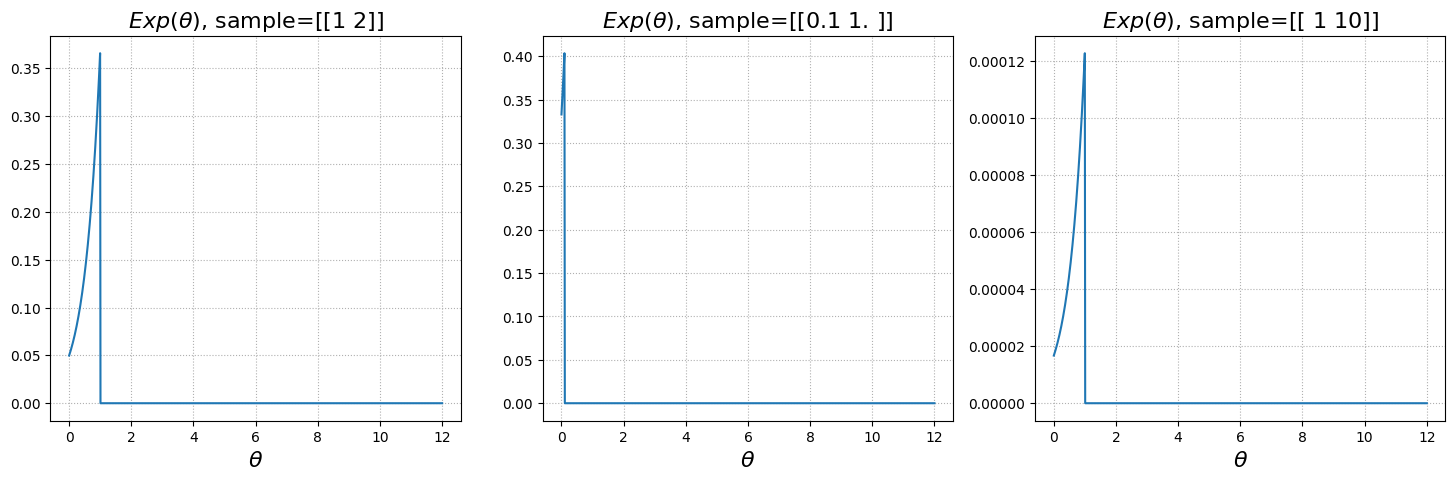

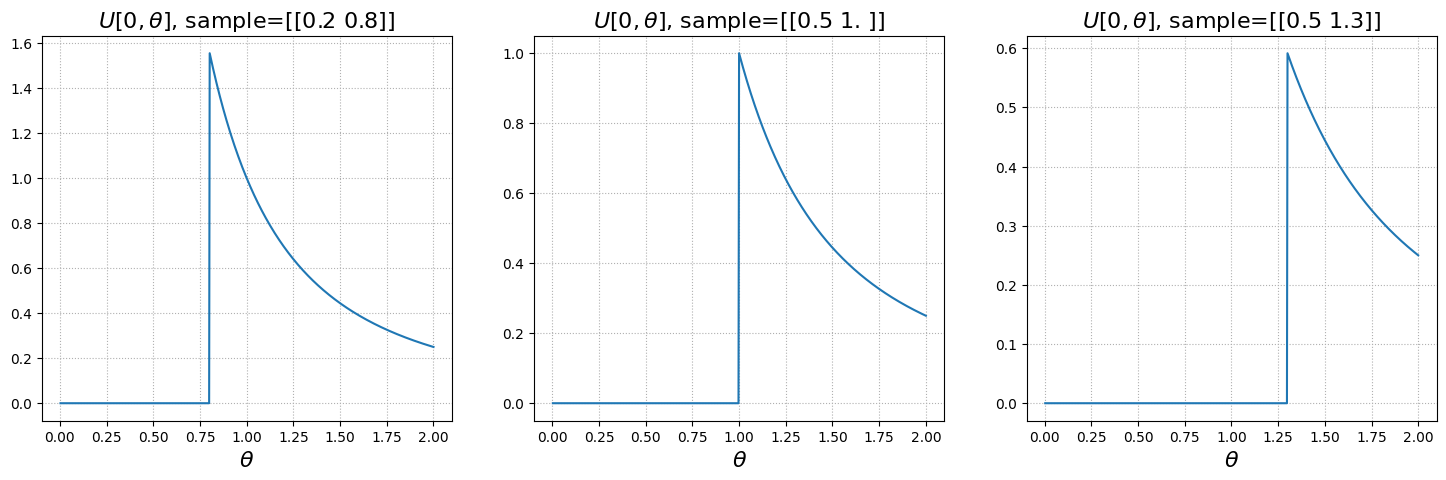

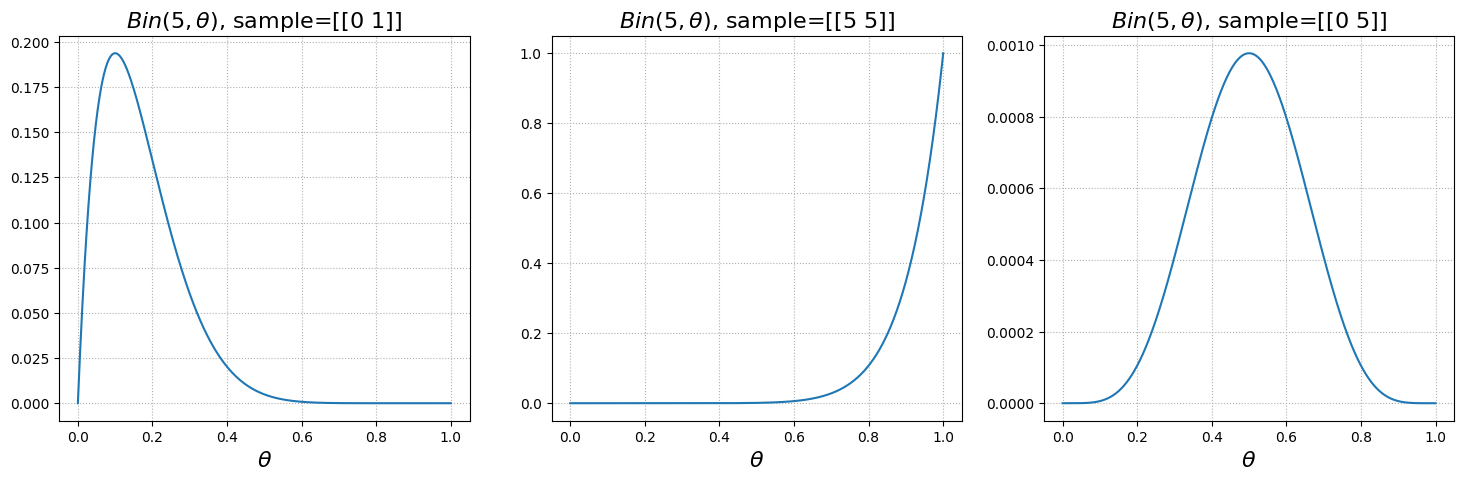

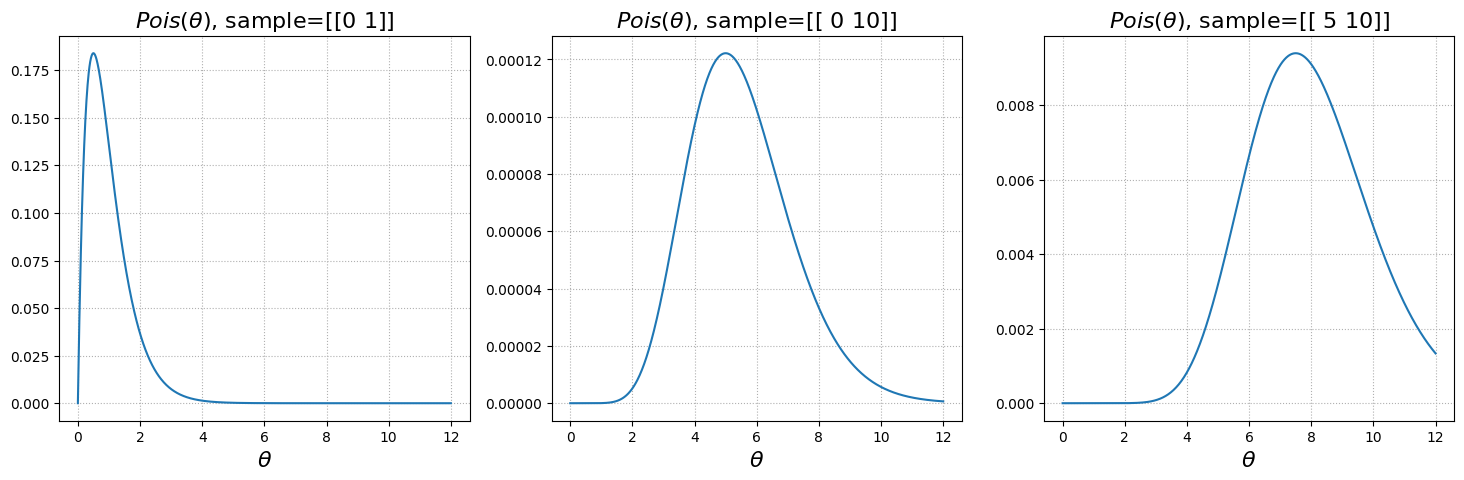

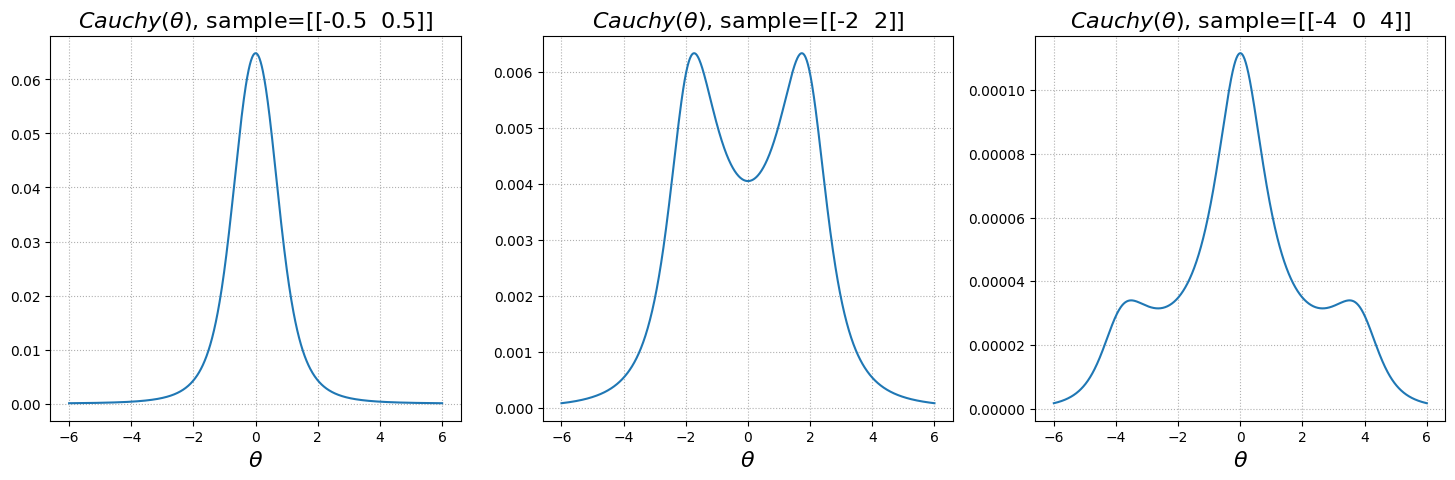

In [10]:
import scipy.stats as sps
grids = [
    np.linspace(0, 12, 1000).reshape((-1, 1)),
    np.linspace(-1, 2, 1000).reshape((-1, 1)),
    np.linspace(0, 1, 1000).reshape((-1, 1)),
    np.linspace(0, 12, 1000).reshape((-1, 1)),
    np.linspace(-6, 6, 1000).reshape((-1, 1)),
]


distributions = [ 
    sps.expon(loc=grids[0]).pdf,
    sps.uniform(loc=0,scale=grids[1]).pdf,
    sps.binom(5,grids[2]).pmf,
    sps.poisson(grids[3]).pmf,
    sps.cauchy(loc=grids[4]).pdf
]

samples = [
    [[1, 2], [0.1, 1], [1, 10]],
    [[0.2, 0.8], [0.5, 1], [0.5, 1.3]],
    [[0, 1], [5, 5], [0, 5]],
    [[0, 1], [0, 10], [5, 10]],
    [[-0.5, 0.5], [-2, 2], [-4, 0, 4]],
]

titles = [
 r'$Exp(\theta)$',
 r'$U[0, \theta]$',
 r'$Bin(5, \theta)$',
 r'$Pois(\theta)$',
 r'$Сauchy(\theta)$',
]

for grid,distribution,sample,title  in zip(grids,distributions,samples,titles):
    draw_likelihood(distribution, grid, sample, title)

Прокомментируйте полученные графики. Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

**Вывод:**
1. Графики отвечают на вопрос, как изменяется вероятность заданного сэмпла при изменении параметра $\theta$.
2. 
   - Для экспоненциального и равномерного распределения максимум правдоподобия определяется наименьшим/наибольшим сэмплом. Плотность вероятности также задаёт нуль невероятным $\theta$ - модельна разумна :smile: 
   - Добротность пика в биномальном распределении определяется числом сэмплов и редкостью сэмпла.Sanity check также выполнен - при наличии ненулевого сэмпла $\rightarrow p(\theta =0) = 0$.
   - Пуассоновское распределение - good :smile: Максимум правдоподобия определяется средним между сэмплами
   - Коши. Может иметь мультимодальное распределение -> не можем применить ОМП :confused:  
3. Да, является.Обозначается $p(\theta|X)$ - вероятность принять значения тета при заданной выборке. При интегрировании по $\theta$ получаем 1 :smile:




Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже:

In [14]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


In [15]:
sample = sps.norm.rvs(size=10**5)
likelihood = np.log(sps.norm.pdf(sample)).sum()
print(likelihood)

-141789.7050267457


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчета оценки максимального правдоподобия? Реализуйте это.

*Подсказка:* нужно использовать некоторый метод класса, реализующий это распределение

**Ответ на вопрос и описание метода решения проблемы:**

float64 имеет ограничения в разрешениии чисел в [2e-308,1.7e308]. Произведение $1e5$ величин порядка $1e-1$ превысит предел точности, получаем 0. Разрешить проблему можно используя для поиска максимума логарифм правдоподобия.
